## Multilayer Net Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First some test data will be generated:

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

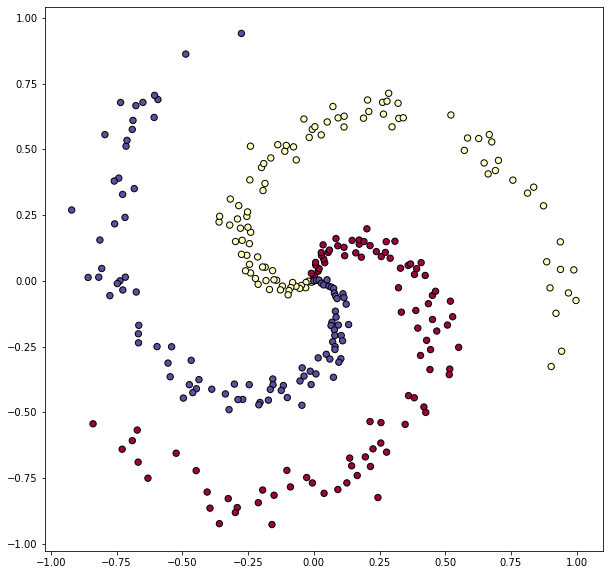

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

### Single Layer Linear Classifier

In [4]:
import src.MultiLayerNet as MLN

In [5]:
net = MLN.Network()
net.add_layer('connected', 2, 3)
net.train(X, y, 0.01, 100)

epoch 0/100 - loss 1.0977919192555672


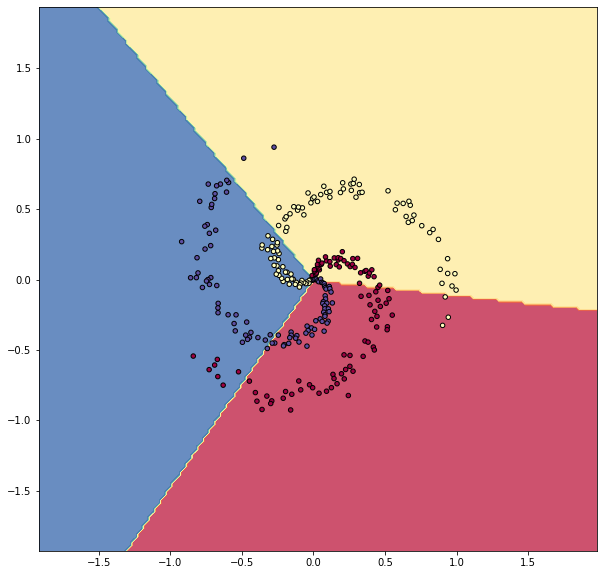

In [6]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
x_data = np.c_[xx.ravel(), yy.ravel()]
Z = net.predict(x_data)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Multi-Layer Classifier

In [17]:
net = MLN.Network()
net.add_layer('connected', 2, 100)
net.add_layer('ReLU', 100, 0)
net.add_layer('connected', 100, 100)
net.add_layer('ReLU', 100, 0)
net.add_layer('connected', 100, 3)
net.train(X, y, 0.1, 4000, reg=0.002, mu=0.01)

epoch 0/4000 - loss 1.0993438249229996
epoch 1000/4000 - loss 1.0165907020019682
epoch 2000/4000 - loss 0.45852502368601766
epoch 3000/4000 - loss 0.19711989690644185


In [18]:
net2 = MLN.Network()
net2.add_layer('connected', 2, 100)
net2.add_layer('ReLU', 100, 0)
net2.add_layer('connected', 100, 100)
net2.add_layer('ReLU', 100, 0)
net2.add_layer('connected', 100, 3)
net2.train(X, y, 0.1, 4000, reg=0.002)

epoch 0/4000 - loss 1.0992881400961665
epoch 1000/4000 - loss 1.087526736218232
epoch 2000/4000 - loss 0.5115685810261469
epoch 3000/4000 - loss 0.24951041405457505


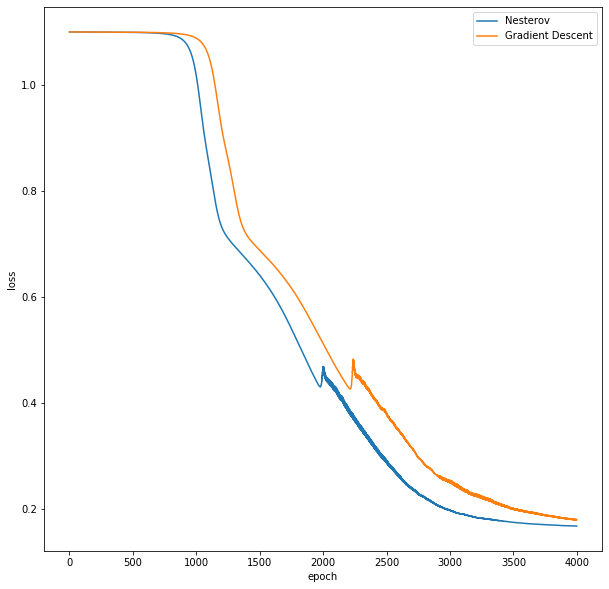

In [20]:
plt.plot(net.loss)
plt.plot(net2.loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Nesterov', 'Gradient Descent'])
plt.show()

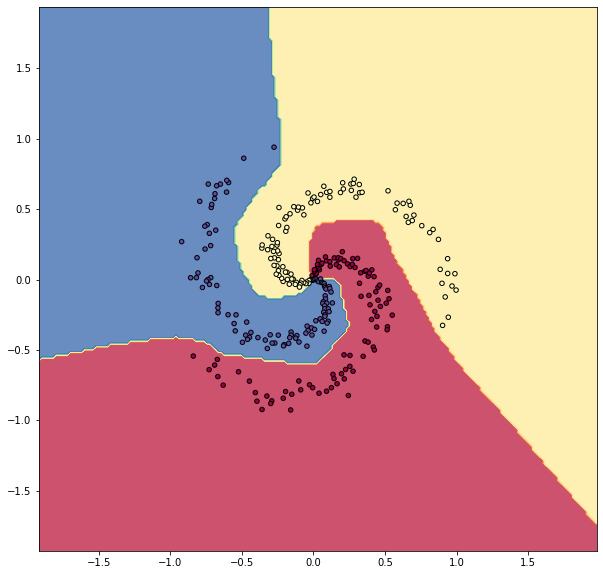

In [15]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
x_data = np.c_[xx.ravel(), yy.ravel()]
Z = net.predict(x_data)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()